In [1]:
import numpy as np
result = np.load('../bayes_implicit_solvent/continuous_parameter_experiments/freesolv_mh_jax_df=5.npz')

In [2]:
list(result.keys())

['traj', 'log_prob_traj', 'expt_means', 'expt_uncs', 'cids', 'elements']

In [3]:
traj = result['traj']
log_prob_traj = result['log_prob_traj']
expt_means = result['expt_means']
expt_uncs = result['expt_uncs']
cids = result['cids']
elements = result['elements']

In [9]:
log_prob_traj.shape

(981, 51)

In [4]:
len(traj)

50031

In [5]:
len(expt_means)

315

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
log_prob_traj = np.hstack(log_prob_traj)

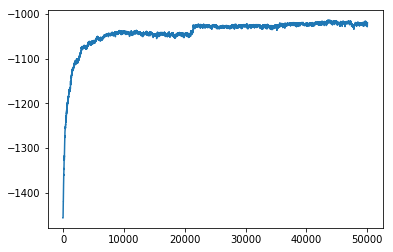

In [15]:
plt.plot(log_prob_traj)

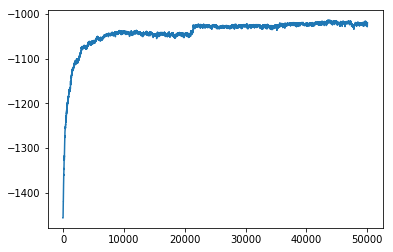

In [16]:
plt.plot(np.hstack(log_prob_traj))
#plt.plot(log_prob_traj2)
#plt.xlim(10000)
#plt.ylim(log_prob_traj[10000],)

In [17]:
list(map(len, log_prob_traj))

TypeError: object of type 'numpy.float64' has no len()

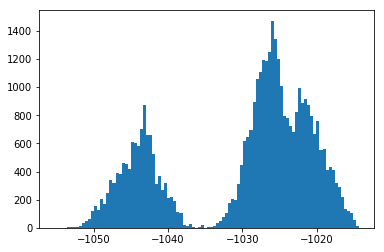

In [19]:
plt.hist(log_prob_traj[10000:], bins=100);
#plt.hist(log_prob_traj2[10000:], bins=100);

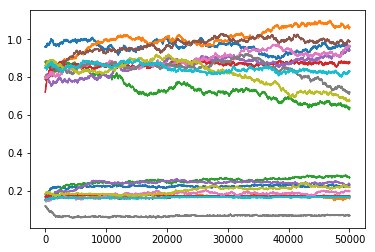

In [20]:
plt.plot(traj)
#traj2 = result2['traj']
#plt.plot(traj2)

(array([  219.,    85.,   195.,   254.,    80.,   733.,  4819., 20234.,
        20105.,  3307.]),
 array([0.17878293, 0.18449425, 0.19020557, 0.19591689, 0.20162821,
        0.20733953, 0.21305085, 0.21876217, 0.22447349, 0.23018481,
        0.23589613]),
 <a list of 10 Patch objects>)

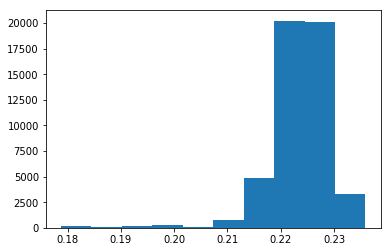

In [21]:
plt.hist(traj[:,0])

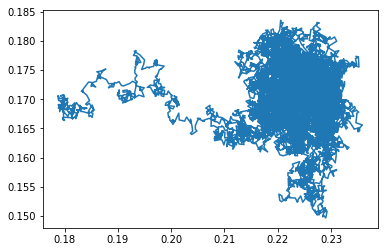

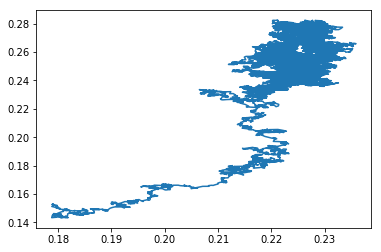

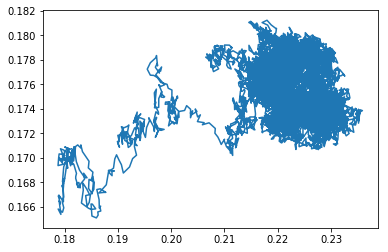

In [22]:
plt.plot(traj[:,0], traj[:,1])
plt.figure()
plt.plot(traj[:,0], traj[:,2])
plt.figure()
plt.plot(traj[:,0], traj[:,3])

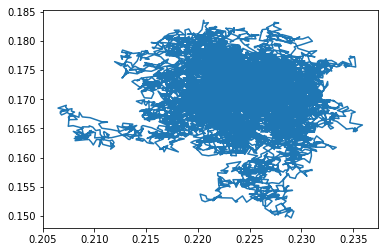

In [23]:
plt.plot(traj[2000:,0], traj[2000:,1])

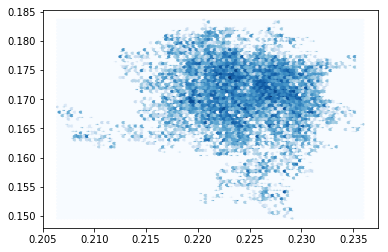

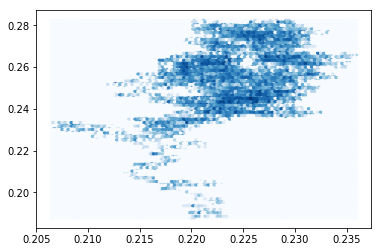

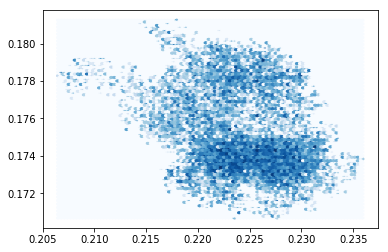

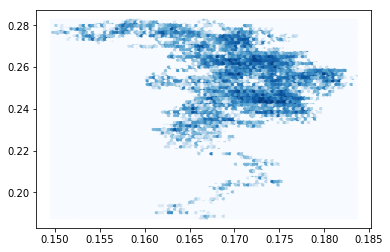

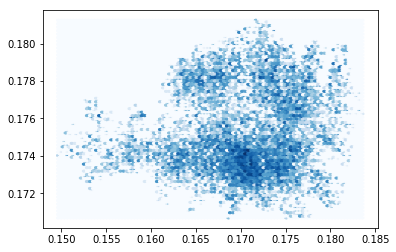

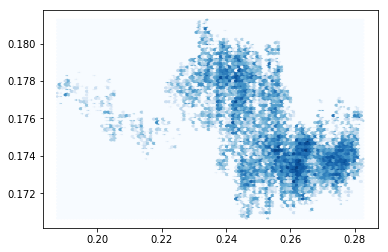

In [24]:
plt.hexbin(traj[2000:,0], traj[2000:,1], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,0], traj[2000:,2], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,0], traj[2000:,3], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,1], traj[2000:,2], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,1], traj[2000:,3], cmap='Blues', bins='log');
plt.figure()
plt.hexbin(traj[2000:,2], traj[2000:,3], cmap='Blues', bins='log');

In [26]:
from bayes_implicit_solvent.continuous_parameter_experiments.test_predict import get_train_predictions, get_test_predictions

In [28]:
from tqdm import tqdm
thinning = 50
train_prediction_traj = np.array([get_train_predictions(theta) for theta in tqdm(traj[::thinning])])

100%|██████████| 1001/1001 [03:34<00:00,  5.24it/s]


In [29]:
test_prediction_traj = np.array([get_test_predictions(theta) for theta in tqdm(traj[::thinning])])

100%|██████████| 1001/1001 [04:04<00:00,  4.73it/s]


In [69]:
prediction_traj.shape

(2001, 315)

In [31]:
from bayes_implicit_solvent.continuous_parameter_experiments.test_predict import train_mols, test_mols
expt_means_train = np.array([mol.experimental_value for mol in train_mols])
expt_means_test = np.array([mol.experimental_value for mol in test_mols])

In [64]:
expt_uncs_train = np.array([mol.experimental_uncertainty for mol in train_mols])
expt_uncs_test = np.array([mol.experimental_uncertainty for mol in test_mols])

In [32]:
from simtk import unit
from bayes_implicit_solvent.constants import beta
def unreduce(value):
    """Input value is in units of kB T, turn it into units of kilocalorie_per_mole"""
    return value / (beta * unit.kilocalorie_per_mole)

def rmse_in_kcal_mol(x, y):
    x_, y_ = unreduce(x), unreduce(y)
    squared_errors = (x_ - y_)**2
    mean_squared_errors = np.mean(squared_errors)
    root_mean_squared_errors = np.sqrt(mean_squared_errors)
    return root_mean_squared_errors

In [34]:
train_rmses = np.array([rmse_in_kcal_mol(snapshot, expt_means_train) for snapshot in train_prediction_traj])
test_rmses = np.array([rmse_in_kcal_mol(snapshot, expt_means_test) for snapshot in test_prediction_traj])

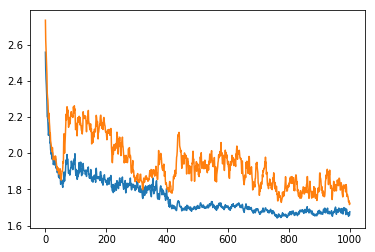

In [36]:
plt.plot(train_rmses)
plt.plot(test_rmses)

In [37]:
np.min(train_rmses), np.min(test_rmses)

(1.6419453449506753, 1.7157593060421958)

In [85]:
from bayes_implicit_solvent.utils import remove_top_right_spines

In [105]:
N = int(len(traj[0]) / 2)

In [106]:
thinning

50

In [109]:
minval, maxval = -15.5, 5.5
train_color = 'lightblue'
test_color = 'green'
train_style = '--'
test_style = '-'
s=10

In [ ]:
diag = np.linspace(minval, maxval)

In [131]:
radii_traj = np.array(traj[:,:N]) * 10
scale_traj = np.array(traj[:,N:])
min_radii = np.min(radii_traj)
max_radii = np.max(radii_traj)

min_scales = np.min(scale_traj)
max_scales = np.max(scale_traj)

In [141]:
min_radii, max_radii

(0.5725116390125033, 2.8242754943635378)

In [142]:
min_scales, max_scales

(0.6278742990866798, 1.1000443151936845)

In [132]:
# radius, scale, train scatter, test scatter, rmse trace, PCA projection
def plot_dashboard(t=1000):
    
    
    # radii
    ax = plt.subplot(2,2,1)
    remove_top_right_spines(ax)
    radii_traj = np.array(traj[:t*thinning][:,:N]) * 10
    ax.plot(radii_traj)
    ax.set_xlabel('MCMC iteration')
    ax.set_ylabel('radius (angstroms)')
    ax.set_xlim(0, len(traj))
    ax.set_ylim(min_radii - 0.05, max_radii + 0.05)
    ax.set_title('radii')
    
    # scales
    ax = plt.subplot(2,2,3)
    remove_top_right_spines(ax)
    scale_traj = traj[:t*thinning][:,N:]
    ax.plot(scale_traj)
    ax.set_xlabel('MCMC iteration')
    ax.set_ylabel('scale_factor')
    ax.set_xlim(0, len(traj))
    ax.set_ylim(min_scales - 0.05, max_scales + 0.05)
    ax.set_title('scale_factors')
    
    # scatter plots
    ax = plt.subplot(2,2,2)
    remove_top_right_spines(ax)
    ax.scatter(unreduce(train_prediction_traj[t]), unreduce(expt_means_train), c=train_color, alpha=0.8, s=s)
    ax.scatter(unreduce(test_prediction_traj[t]), unreduce(expt_means_test), c=test_color, alpha=0.8, s=s)
    ax.set_xlim(minval, maxval)
    ax.set_ylim(minval, maxval)
    ax.set_xticks([-15,-10,-5,0,5])
    ax.set_yticks([-15,-10,-5,0,5])
    ax.plot(diag, diag, color='grey', linestyle='--', alpha=0.5)
    
    ax.set_xlabel(r'predicted $\Delta G$ (kcal/mol)')
    ax.set_ylabel(r'measured $\Delta G$ (kcal/mol)')
    plt.title('train RMSE: {:.2f} kcal/mol\ntest RMSE: {:.2f} kcal/mol'.format(train_rmses[t], test_rmses[t]))
    
    # rmse_trace
    ax = plt.subplot(2,2,4)
    remove_top_right_spines(ax)
    x = np.arange(t*thinning)[::thinning]
    #ax.plot(x, train_rmses[:t], c=train_color, alpha=0.8, linestyle=train_style)
    #ax.plot(x, test_rmses[:t], c=test_color, alpha=0.8, linestyle=test_style)
    
    ax.plot(x, train_rmses[:t], c=train_color, alpha=0.8, linestyle=train_style, label='train (n={})'.format(len(train_mols)))
    ax.plot(x, test_rmses[:t], c=test_color, alpha=0.8, linestyle=test_style, label='test (n={})'.format(len(test_mols)))
    ax.hlines(2.425900278028874, 0, len(train_rmses) * thinning, linestyles='-', label='OBC2 (n=631)')
    ax.hlines(1.642, 0, len(train_rmses) * thinning, linestyles='--', label='SMIRNOFF+TIP3P (n=642)')
    ax.hlines(0.98, 0, len(train_rmses) * thinning, linestyles='dotted', label='OPLS3e (n=418)')
    
    plt.ylabel('RMSE (kcal/mol)')
    plt.xlabel('MCMC iterations')
    plt.legend(loc='upper right')
    plt.xlim(0, len(train_rmses) * thinning)
    plt.ylim(0, 4)
    
    plt.title('RMSE trace')
    
    plt.tight_layout()


In [133]:
for t in range(1,len(train_rmses),5):
    plt.figure(figsize=(8,8))
    plot_dashboard(t)
    plt.savefig('MH_dashboard/{:04}.png'.format(t), dpi=100)
    plt.close()

Text(0.5, 1.0, 'radii')

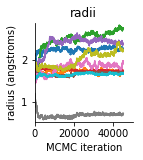

In [111]:
t = 900
ax = plt.subplot(2,3,1)
remove_top_right_spines(ax)
radii_traj = np.array(traj[:t*thinning][:,:N]) * 10
ax.plot(radii_traj)
ax.set_xlabel('MCMC iteration')
ax.set_ylabel('radius (angstroms)')
ax.set_xlim(0, len(traj))
ax.set_ylim(np.min(radii_traj) - 0.05, np.max(radii_traj) + 0.05)
ax.set_title('radii')

In [101]:
len(traj)

50031

In [102]:
traj[:900*thinning][:,:N]

array([[0.18      , 0.17      , 0.15      , ..., 0.85      , 0.86      ,
        0.85      ],
       [0.18      , 0.17      , 0.15      , ..., 0.85      , 0.86      ,
        0.85      ],
       [0.18      , 0.17      , 0.15      , ..., 0.85      , 0.86      ,
        0.85      ],
       ...,
       [0.22450506, 0.16949749, 0.27419326, ..., 0.7903017 , 0.72036925,
        0.82918682],
       [0.22450506, 0.16949749, 0.27419326, ..., 0.7903017 , 0.72036925,
        0.82918682],
       [0.22450506, 0.16949749, 0.27419326, ..., 0.7903017 , 0.72036925,
        0.82918682]])

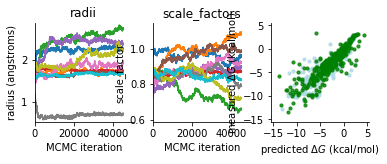

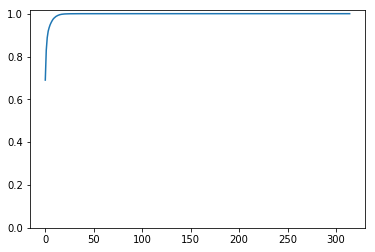

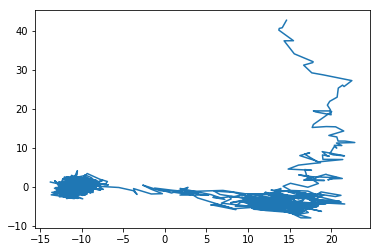

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_prediction_traj)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0,)

plt.figure()

y = pca.transform(train_prediction_traj)
plt.plot(y[:,0], y[:,1])

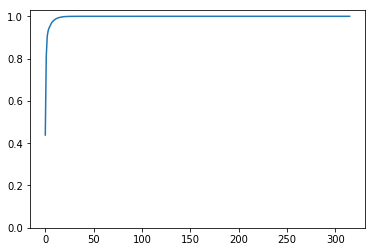

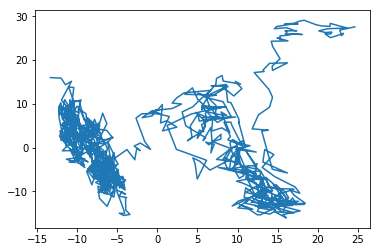

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(test_prediction_traj)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(0,)

plt.figure()

y = pca.transform(test_prediction_traj)
plt.plot(y[:,0], y[:,1])

Would be interesting to apply canonical correlation analysis to the train and test prediction trajectories... May give a sense of which 

In [49]:
from sklearn.cross_decomposition import CCA
cca = CCA()
cca.fit(train_prediction_traj[100:], test_prediction_traj[100:])

/Users/joshuafass/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [51]:
len(train_prediction_traj)

1001

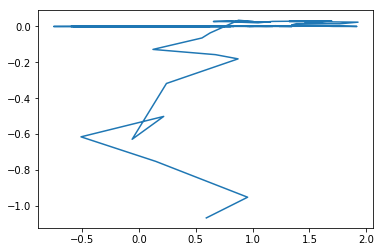

In [52]:
cca_transformed = cca.transform(train_prediction_traj)
plt.plot(*cca_transformed.T)

In [53]:
cca.score(train_prediction_traj, test_prediction_traj)

-1.429731442116603

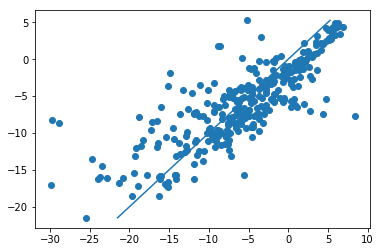

In [78]:
plt.scatter(train_prediction_traj[0], expt_means_train)
diag = np.linspace(min(expt_means_train), max(expt_means_train))
plt.plot(diag, diag)

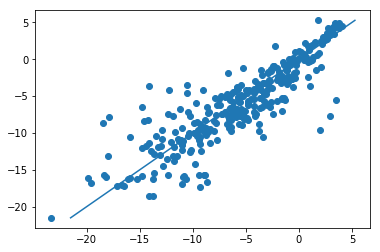

In [56]:
plt.scatter(train_prediction_traj[-1], expt_means_train)
diag = np.linspace(min(expt_means_train), max(expt_means_train))
plt.plot(diag, diag)

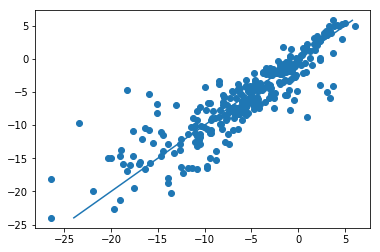

In [57]:
plt.scatter(test_prediction_traj[-1], expt_means_test)
diag = np.linspace(min(expt_means_test), max(expt_means_test))
plt.plot(diag, diag)

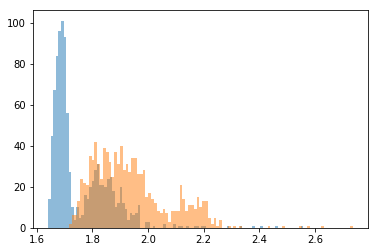

In [58]:
plt.hist(train_rmses, bins=100, alpha=0.5);
plt.hist(test_rmses, bins=100, alpha=0.5);

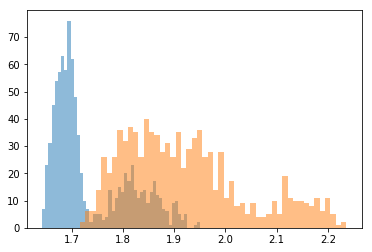

In [60]:
plt.hist(train_rmses[100:], bins=50, alpha=0.5);
plt.hist(test_rmses[100:], bins=50, alpha=0.5);

In [65]:
x = np.linspace(np.min(test_prediction_traj), np.max(test_prediction_traj))

from scipy.stats import t as student_t
ys = [student_t.pdf(x, loc=expt_means_test[i], scale=expt_uncs_test[i], df=7) for i in range(len(expt_means_test))]

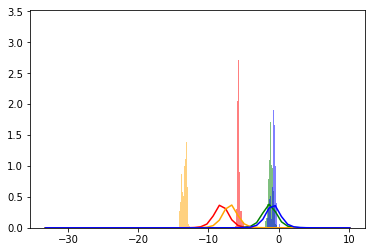

In [66]:
colors = ['red', 'green', 'orange', 'blue']

for i in range(len(colors)):
    plt.hist(test_prediction_traj[:,i], bins=50, density=True, color=colors[i], alpha=0.5);
    plt.plot(x, ys[i], c=colors[i])

In [67]:
diffs = np.diff(traj[100:], axis=0)

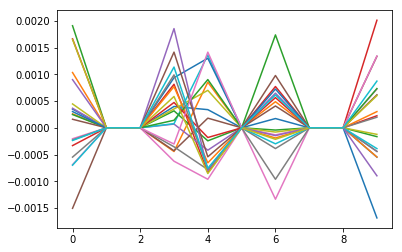

In [68]:
plt.plot(diffs[:10])

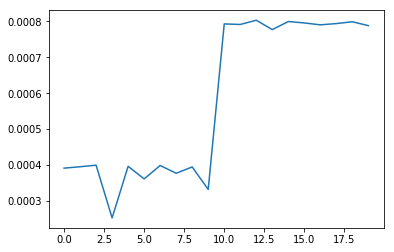

In [69]:
plt.plot(np.mean(np.abs(diffs)[np.linalg.norm(diffs, axis=1) > 0], 0))

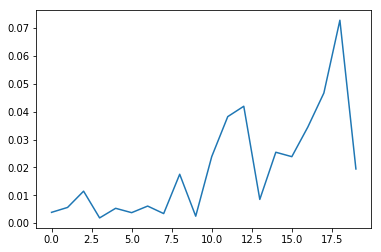

In [70]:
plt.plot(np.std(traj[10000:], axis=0))

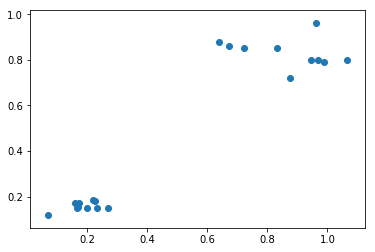

In [71]:
plt.scatter(traj[-1], traj[0])

In [72]:
N = int(len(traj[-1]) / 2)
sorted(traj[-1][:N])

[0.07004555235274468,
 0.161021956569573,
 0.16544831186919265,
 0.17074340298660057,
 0.1743077620337627,
 0.1983825823519902,
 0.21925720742306745,
 0.22764971304577516,
 0.23301735657434663,
 0.2705226427138449]

In [74]:
np.argmin(traj[-1][:N])

7

In [75]:
log_prob_traj[-1]

-1019.8247017486899

In [76]:
log_prob_traj[0]

-1455.9611182965007

In [136]:
mol = train_mols[0]

In [139]:
set([a.element.symbol for a in mol.top.atoms()]) == {'C', 'H'}

False